In [18]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs

In [19]:
url = "https://www.amazon.in/Echo-Dot-3rd-Gen/dp/B07PFFMP9P"
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
src = requests.get(url, headers=headers).text

In [20]:
soup = bs(src, 'html.parser')

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{
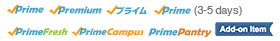
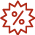

In [21]:
print(soup.prettify())

In [28]:
reviews = soup.findAll('div', {'class': 'review-text-content'})
all_reviews = []
for review in reviews:
    all_reviews.append(review.get_text()[1:-1])

In [30]:
ratings = soup.findAll('i', {'class': 'review-rating'})
all_ratings = []
for rating in ratings:
    all_ratings.append(rating.get_text().split()[0])

In [48]:
customer_names = soup.findAll('span', {'class':  'a-profile-name'})
customer_names = customer_names[2:]
del customer_names[5]

all_customer_names = []
for customer_name in customer_names:
    all_customer_names.append(customer_name.get_text())

In [57]:
review_titles = soup.findAll('a', {'class': 'review-title'})
all_review_titles = []
for review_title in review_titles:
    all_review_titles.append(review_title.get_text()[1:-1])

In [59]:
data = {
    'Customer Names': all_customer_names,
    'Review Title': all_review_titles,
    'Rating': all_ratings,
    'Review': all_reviews
}

In [61]:
df = pd.DataFrame(data)

In [62]:
df

,Customer Names,Review Title,Rating,Review
0,Rochak jha,Fantastic Addition to My Home - Amazon Alexa 3...,5.0,I recently purchased the Amazon Alexa 3rd Gen ...
1,shamshuddin,Alexa awesome,4.0,Nice tool to enjoy and even for elders...
2,Rj,I is good,4.0,I should play music from YouTube also
3,Vivekk,Good Product to fall in Love,4.0,Keep exploring nice device.... Only thing that...
4,Guruprasad,Product is good,4.0,Overall good product but need to add local lan...
5,Nidhi Tripathi,Good budget knowledgeable product.,4.0,We can utilise it in many ways like children s...
6,Apurba Das,Good as a replacement,4.0,You can buy it as a replacement for high cost ...
7,Sunny Thakur,Nice product,4.0,Nice product but i faced a little issue after ...


In [64]:
df.to_csv('scrapper/ps29.csv')